Affine transformation, bir düzlemdeki noktaların başka bir düzleme taşınması için kullanılan bir matematiksel işlemdir. Bu işlem, orijinal şeklin ölçeklendirilmesi, döndürülmesi, kaydırılması ve kesilmesi gibi değişiklikleri içerebilir. Affine transformation, doğrusal dönüşüm matrisleri kullanılarak hesaplanır.

Matematiksel olarak, 2-boyutlu bir vektör x = [x, y] transpozesi ile bir affine dönüşüm matrisi A arasındaki ilişki şu şekildedir:

[A]*[x] = [b]

Burada, [A] 2x2 boyutlu bir matrisdir ve [b] 2x1 boyutlu bir sütun vektörüdür. [A] matrisi, ölçeklendirme, döndürme, kaydırma ve kesme işlemlerini içerir. [b] sütun vektörü, x ve y koordinatlarındaki değişiklikleri temsil eder.

Affine transformation matrisi aşağıdaki şekilde gösterilebilir:

[A] = [a11, a12; a21, a22]

[b] = [tx, ty]

Burada, a11 ve a22 ölçeklendirme faktörleridir, a12 ve a21 döndürme parametreleridir ve tx ve ty kaydırma parametreleridir.

Affine transformation, görüntü işlemede sıkça kullanılan bir işlemdir. Örneğin, bir görüntüdeki nesnelerin konumunu, boyutunu ve yönelimini değiştirmek için kullanılabilir. Ayrıca, bir görüntünün perspektif etkisini azaltmak veya düzeltmek için de kullanılabilir.

Affine dönüşümlerinde yalnızca yatay döndürmeler (dönüş açısı 0 veya 180 derece) ve çeşitli boyutlandırma, kesme ve kaydırma işlemleri gerçekleştirilebilir. Dikey döndürmeler (dönüş açısı 90 veya 270 derece) için ise perspektif dönüşümleri gibi daha karmaşık dönüşüm işlemleri kullanılması gerekebilir.

Ancak, yatay bir döndürme örneği vermek gerekirse, aşağıdaki gibi bir dönüşüm matrisi kullanılabilir:

[A] = [cos(θ), -sin(θ), 0;
sin(θ), cos(θ), 0;
0, 0, 1]

Burada θ, yatay döndürme açısıdır. Bu matris, orijinal görüntüyü θ derece döndürür ve yatay bir eksen boyunca simetri sağlar. Matrisin son sütunu [0 0 1] eklenerek, dönüşümün homojen koordinat formuna dönüştürülür.

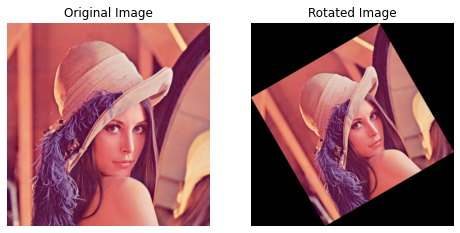

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükle
image = cv2.imread("Lenna.png")

# Yatay döndürme açısı (30 derece)
angle = 30

# Görüntü boyutlarını al
(h, w) = image.shape[:2]

# Döndürme merkezi noktasını hesapla
center = (w // 2, h // 2)

# Döndürme matrisini hesapla
M = cv2.getRotationMatrix2D(center, angle, 1.0)

# Yeni boyutları hesapla ve döndürme matrisini ayarla
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))
M[0, 2] += (new_w / 2) - center[0]
M[1, 2] += (new_h / 2) - center[1]

# Görüntüyü döndür
rotated = cv2.warpAffine(image, M, (new_w, new_h))

# Görüntüyü pyplot kullanarak göster
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
ax[1].set_title("Rotated Image")
ax[1].axis('off')
plt.show()